In [122]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import scipy
from skimage import data
from skimage import filters, io
from skimage import exposure
from skimage.morphology import disk
from skimage import restoration
import os

## 1.) Intro and Concepts

#### Images are NumPy’s arrays np.ndarray

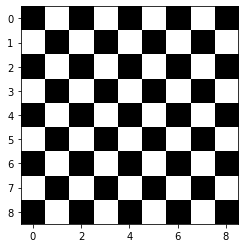

In [3]:
check = np.zeros((9, 9))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
plt.imshow(check, cmap='gray', interpolation='nearest') 
plt.show()

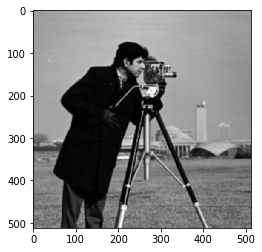

In [13]:
camera = data.camera() # comes from scikit-image library

filtered_camera = filters.gaussian(camera, 1)

plt.imshow(filtered_camera, cmap="gray")
plt.show()

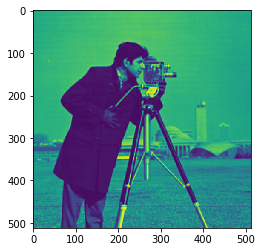

In [14]:
plt.imshow(camera)
plt.show()

In [5]:
camera.dtype

dtype('uint8')

In [6]:
camera.shape

(512, 512)

In [7]:
type(filtered_camera)

numpy.ndarray

## 2.) Color Spaces

#### Color images are of shape (N, M, 3) or (N, M, 4) (when an alpha channel encodes transparency)

(768, 1024, 3)


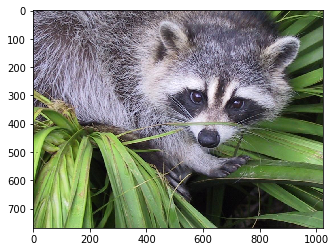

In [19]:
face = scipy.misc.face()
print(face.shape)
plt.imshow(face)
plt.show()

### Excercise 1

#### Open a color image on your disk as a NumPy array.

#### Find a skimage function computing the histogram of an image and plot the histogram of each color channel

#### Convert the image to grayscale and plot its histogram.

In [25]:
blue = face[...,0]
green = face[...,1]
red = face[...,2]

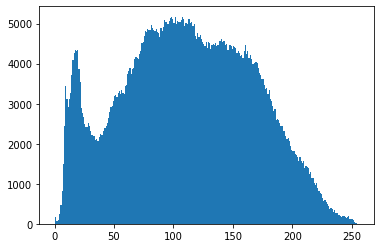

In [33]:
plt.hist(blue.ravel(), 256, [0,256])
plt.show()

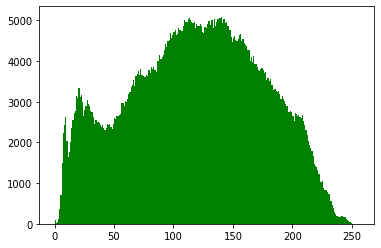

In [35]:
plt.hist(green.ravel(), 256, [0,256], color='g')
plt.show()

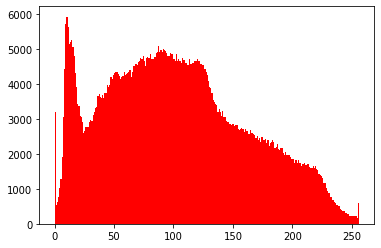

In [34]:
plt.hist(red.ravel(), 256, [0,256], color='r')
plt.show()

#### Redoing excercise with custom image

In [52]:
path = os.getcwd() + "/images/greens.jpg"
img = io.imread(path)

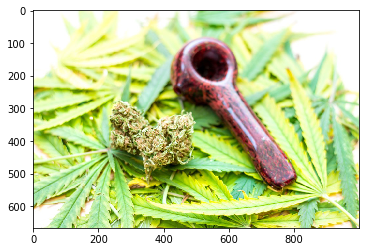

In [54]:
plt.imshow(img)
plt.show()

In [85]:
blue = img[...,0]
green = img[...,1]
red = img[...,2]

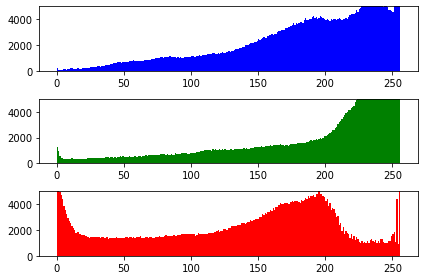

In [93]:
fig, ax = plt.subplots(3)

ax[0].hist(blue.ravel(), 256, [0,256], color='b')
ax[1].hist(green.ravel(), 256, [0,256], color='g')
ax[2].hist(red.ravel(), 256, [0,256], color='r')

ax[0].set_ylim(0,5000)
ax[1].set_ylim(0,5000)
ax[2].set_ylim(0,5000)

plt.tight_layout()

plt.show()

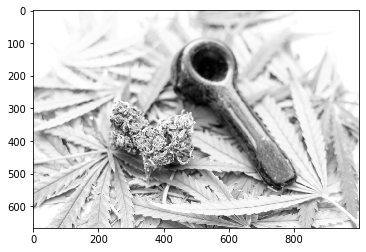

In [95]:
grayImg = io.imread(path, as_gray = True)
plt.imshow(grayImg)
plt.show()

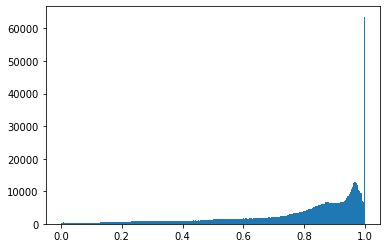

In [111]:
plt.hist(grayImg.ravel(), 256, [0,1])

plt.show()

## 3.) Image Preprocessing / enchancement

#### Goals: denoising, feature (edges) extraction, …

In [115]:
text = data.text()
hsobel_text = filters.sobel_h(text) ## Making use of Local filters

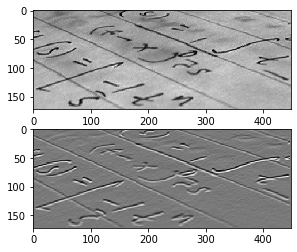

In [114]:
fig, ax = plt.subplots(2)

ax[0].imshow(text)
ax[1].imshow(hsobel_text)

plt.show()

In [117]:
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera) ## Making use of non-local filters

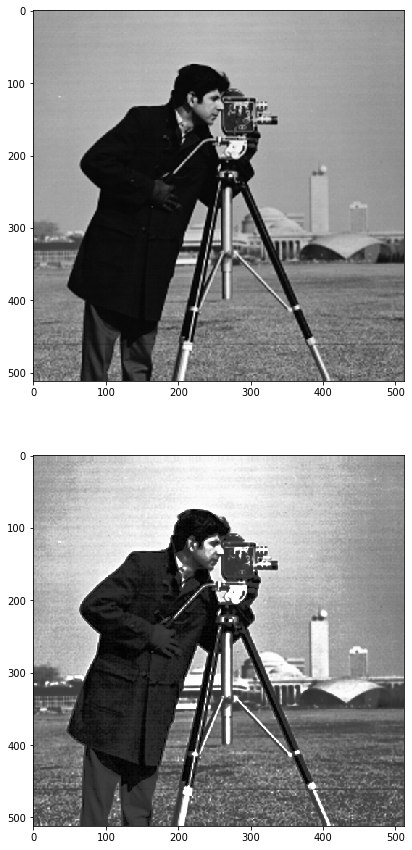

In [121]:
fig, ax = plt.subplots(2, figsize=(15,15))

ax[0].imshow(camera)
ax[1].imshow(camera_equalized)

plt.show()

In [127]:
coins = data.coins() ## Denoising examples
coins_zoom = coins[10:80, 300:370]
median_coins = filters.median(coins_zoom, disk(1))
tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
gaussian_coins = filters.gaussian(coins_zoom, sigma=2)

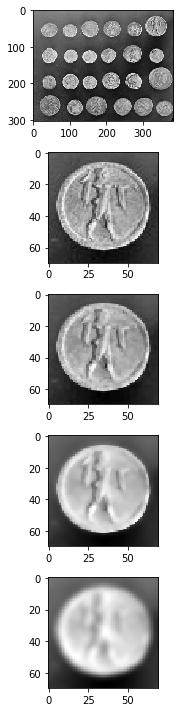

In [128]:
fig, ax = plt.subplots(5, figsize=(10,10))

ax[0].imshow(coins)
ax[1].imshow(coins_zoom)
ax[2].imshow(median_coins)
ax[3].imshow(tv_coins)
ax[4].imshow(gaussian_coins)

plt.tight_layout()

plt.show()

Make note to also look into mathematical morphology as well. Concept that could be helpful in the future:
https://en.wikipedia.org/wiki/Mathematical_morphology

## 4.) Image Segmentation

#### Image segmentation is the attribution of different labels to different regions of the image, for example in order to extract the pixels of an object of interest.

In [129]:
camera = data.camera() ## Making use of Otsu method; a histogram method to image segmentation
val = filters.threshold_otsu(camera)
mask = camera < val

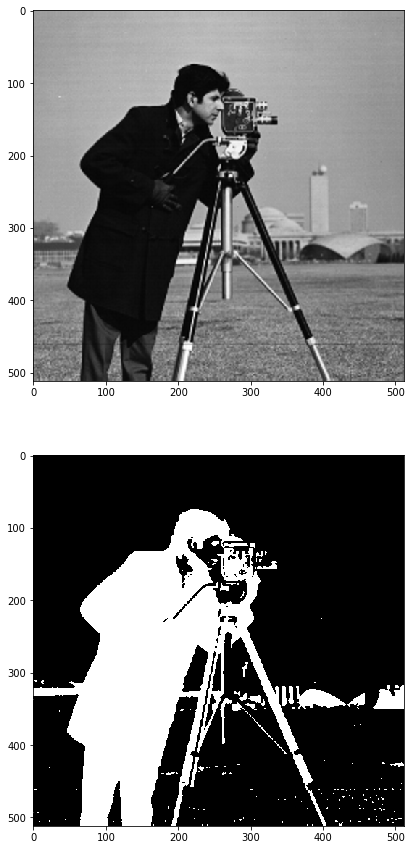

In [130]:
fig, ax = plt.subplots(2, figsize=(15,15))

ax[0].imshow(camera)
ax[1].imshow(mask)

plt.show()